In [1]:
import pandas as pd
import numpy as np


In [7]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [8]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792.0,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
dataset.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.0,1,1,1,101348.88,1


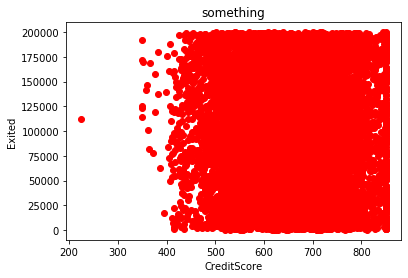

In [10]:
import matplotlib.pyplot as plt
x = dataset['CreditScore']
y = dataset['EstimatedSalary']
plt.scatter(x,y,color = 'red')
plt.xlabel('CreditScore')
plt.ylabel('Exited')
plt.title("something")
plt.show()

In [11]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore         True
Geography           True
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
dataset['CreditScore'].fillna(dataset['CreditScore'].mean(),inplace = True)

In [7]:
dataset['Geography'].fillna(dataset['Geography'].mode()[0],inplace = True)

In [8]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Geography'] = le.fit_transform(dataset['Geography'])
dataset['Gender'] = le.fit_transform(dataset['Gender'])


In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.000000,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.000000,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.000000,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.000000,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,650.532813,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
x1 = dataset.iloc[:,3:13].values
y1  = dataset.iloc[:,13].values

In [12]:
type(x1)

numpy.ndarray

In [13]:
y1

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [14]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(categorical_features = [1])
x1 = one.fit_transform(x1).toarray()

C:\Users\prads\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\prads\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
x1[:,3]

array([619., 608., 502., ..., 709., 772., 792.])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.2, random_state = 0)

In [19]:
x1.shape

(10000, 12)

In [20]:
y1.shape

(10000,)

In [21]:
x_train.shape

(8000, 12)

In [22]:
y_test.shape

(2000,)

In [23]:
x_train[:,3]

array([667., 427., 535., ..., 738., 590., 623.])

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [26]:
y_pred = classifier.predict(x_test)



In [27]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [28]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.807

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[1383,  212],
       [ 174,  231]], dtype=int64)

In [32]:
x_test.shape

(2000, 12)

In [34]:
ypred1 = classifier.predict(sc.transform(np.array([[1,0,0,600,0,23,4,50000,5,1,1,500000]])))

In [35]:
ypred1

array([1], dtype=int64)

In [37]:
import pickle
pickle.dump(classifier,open('churn.pkl','wb'))
model=pickle.load(open('churn.pkl','rb'))



In [39]:
from sklearn.externals import joblib
scaler_filename = "churn.save"
joblib.dump(sc, scaler_filename)

C:\Users\prads\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['churn.save']